## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [1]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [5]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

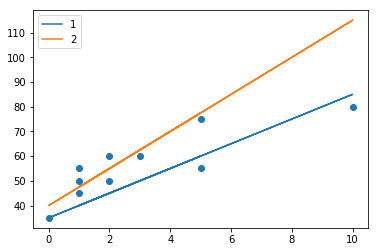

In [6]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [7]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [8]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [9]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [10]:
X.shape

(2, 10)

In [11]:
X.T.shape

(10, 2)

In [12]:
all(X @ y == np.dot(X,y))

True

In [13]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [14]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

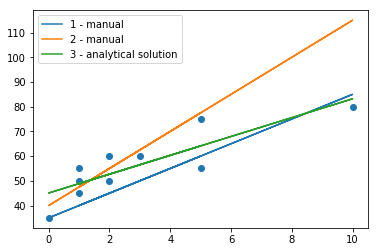

In [15]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [16]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [17]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [18]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [19]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875)

Градиентный спуск

In [20]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [21]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [22]:
W[0], W[0] - g

(45.0625, 45.29125)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [23]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


In [24]:
# реализуем градиентный спуск
def gradient_descent(alpha, iterations, W, X=X, y=y):
    n = X.shape[1]
    err = np.inf
    for i in range(iterations):
        y_pred = np.dot(W, X)
        err_new = calc_mse(y, y_pred)
        if err_new < err:
            err = err_new
            for j in range(W.shape[0]):
                W[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y))) 
        else:
            return i-1, W, err
    return i, W, err

In [25]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    error = np.mean((y - y_pred)**2)
    return error

In [26]:
# подбор оптимальных параметров
min_err = np.inf
min_coef = ()

for alpha in [1e-1, 1e-2, 1e-3, 1e-4]:
    for iters in [1e3, 1e4, 1e5, 1e6]:
        W = np.array([1, 0.5])
        num, wi, err = gradient_descent(alpha, int(iters), W)
        print(f'Альфа = {alpha}, количество итераций = {iters}. Ошибка: {err}')
        if err < min_err:
            min_err = err
            min_coef = (alpha, iters)

print(f'Минимальная ошибка {min_err} достигается при коэфициентах {min_coef}')

Альфа = 0.1, количество итераций = 1000.0. Ошибка: 3047.75
Альфа = 0.1, количество итераций = 10000.0. Ошибка: 3047.75
Альфа = 0.1, количество итераций = 100000.0. Ошибка: 3047.75
Альфа = 0.1, количество итераций = 1000000.0. Ошибка: 3047.75
Альфа = 0.01, количество итераций = 1000.0. Ошибка: 43.96875935998759
Альфа = 0.01, количество итераций = 10000.0. Ошибка: 43.968750000001044
Альфа = 0.01, количество итераций = 100000.0. Ошибка: 43.968750000001044
Альфа = 0.01, количество итераций = 1000000.0. Ошибка: 43.968750000001044
Альфа = 0.001, количество итераций = 1000.0. Ошибка: 178.68218642130677
Альфа = 0.001, количество итераций = 10000.0. Ошибка: 43.968759927464326
Альфа = 0.001, количество итераций = 100000.0. Ошибка: 43.968750000010985
Альфа = 0.001, количество итераций = 1000000.0. Ошибка: 43.968750000010985
Альфа = 0.0001, количество итераций = 1000.0. Ошибка: 740.9067599479888
Альфа = 0.0001, количество итераций = 10000.0. Ошибка: 178.56189362246135
Альфа = 0.0001, количество ит

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [27]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.85 5.35], MSE = 3047.75
Iteration #10: W_new = [11.0965715 10.5965715], MSE = 597.49
Iteration #20: W_new = [11.10415569 10.60415569], MSE = 597.49
Iteration #30: W_new = [11.10416665 10.60416665], MSE = 597.49
Iteration #40: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #50: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #60: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #70: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #80: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #90: W_new = [11.10416667 10.60416667], MSE = 597.49


Введено матричное умножение, которое автоматически суммирует требуемые элементы. Ошибка заключалась в суммировании всего и выдаче скаляра, который затем расширился до вектора с одинаковыми элементами.

In [30]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

e = 0.001
last_err = None

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y),  axis=1))
    
    if last_err == None:
        last_err = err
        continue

    elif i % 10 == 0:
        print(f'Итераций = {i}, Подобранные веса = {W}, Ошибка = {err}')
    
    elif last_err - err <= e:
        print(f'Вывод:\n Необходимое кол-во итераций = {i}\n Подобранные веса = {W}\n Финальная ошибка на данной итерации = {err}\n погрешность = {e}\n')
        break

    last_err = err

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Итераций = 10, Подобранные веса = [ 7.0011236 10.6169007], Ошибка = 738.6534565814403
Итераций = 20, Подобранные веса = [10.3486292  10.10603105], Ошибка = 622.0253200502414
Итераций = 30, Подобранные веса = [13.38789582  9.55618391], Ошибка = 525.2425289713664
Итераций = 40, Подобранные веса = [16.16088505  9.05336203], Ошибка = 444.6639230494043
Итераций = 50, Подобранные веса = [18.69110735  8.59454545], Ошибка = 377.57641516768024
Итераций = 60, Подобранные веса = [20.99981865  8.17589626], Ошибка = 321.72122056672055
Итераций = 70, Подобранные веса = [23.10641138  7.79389815], Ошибка = 275.21773784067534
Итераций = 80, Подобранные веса = [25.02858024  7.44534246], Ошибка = 236.5002305237384
Итераций = 90, Подобранные веса = [26.78247081  7.12730145], Ошибка = 204.2651099486187


*3: вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [29]:
err_min = np.inf
err = 1e6
epsila = 1e-5
i = 0
while err_min - err > epsila:
    y_pred = np.dot(W, X)
    err, err_min = calc_mse(y, y_pred), err
    W -= (alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis=1)))
    i += 1
print(f'Итераций = {i}, Подобранные веса = {W}, Ошибка = {err}')

Итераций = 679, Подобранные веса = [45.02904272  3.81856696], Ошибка = 43.9692869712866
